<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(glove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [3]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
df3.columns = ["arti"]

preputama : lower case

In [7]:
def lower(temp):
  return temp.str.lower()

In [8]:
df['dokumen']=lower(df['dokumen'])

In [9]:
df2['tweet']=lower(df2['tweet'])

In [10]:
df3['arti']=lower(df3['arti'])

preputama : Pembersihan noise (over enter and space)

In [11]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [12]:
df=bersih_noise(df)

In [13]:
df2=bersih_noise(df2)

In [14]:
df3=bersih_noise(df3)

preptambah : expand contractions

In [15]:
!pip install contractions
import contractions

     |████████████████████████████████| 321 kB 5.0 MB/s 
     |████████████████████████████████| 284 kB 46.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85456 sha256=d3400f802f0330cf421a00a489ced91cc732a31b83901a2b6b2fa82e435b73ba
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [16]:
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

In [17]:
df.dokumen=expand_word(df.dokumen)

In [18]:
df2.tweet=expand_word(df2.tweet)

In [19]:
df3.arti=expand_word(df3.arti)

preputama : cleansing punctuation

In [20]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [21]:
df['dokumen'] = clns_punc(df['dokumen'])

In [22]:
df2['tweet'] = clns_punc(df2['tweet'])

In [23]:
df3['arti'] = clns_punc(df3['arti'])

preputama : cleansing number

In [24]:
!pip install tweet-preprocessor
import preprocessor as p

In [25]:
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [26]:
df.dokumen=clns_numb(df.dokumen)

In [27]:
df2.tweet=clns_numb(df2.tweet)

In [28]:
df3.arti=clns_numb(df3.arti)

preptambah : remove stopword

In [29]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

In [31]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [32]:
df2['tweet'] = remove_stopw(df2['tweet'])

In [33]:
df3['arti'] = remove_stopw(df3['arti'])

tokenizing

In [34]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [35]:
df.dokumen=token(df.dokumen)

In [36]:
df2.tweet=token(df2.tweet)

In [37]:
df3.arti=token(df3.arti)

preptambah : Lemmatization

In [38]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [39]:
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [40]:
lemma(df['dokumen'])

In [42]:
lemma(df2['tweet'])

In [43]:
lemma(df3['arti'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [37]:
# sent=df.dokumen

In [58]:
sent=df2.tweet.append(df.dokumen,ignore_index=True)

In [ ]:
# sent=df3.arti.append(df.dokumen,ignore_index=True)

In [44]:
sent=df3.arti.append(df2.tweet.append(df.dokumen,ignore_index=True),ignore_index=True)

glove

In [45]:
!pip install glove-python-binary

     |████████████████████████████████| 948 kB 5.1 MB/s 


In [46]:
from glove import Glove
from glove import Corpus

In [59]:
korpus = Corpus()
korpus.fit(sent, window=5, ignore_missing=False,)

In [ ]:
# (corpus, window=10, ignore_missing=False)

In [60]:
glove = Glove(no_components=100, learning_rate=0.05, alpha=0.025, max_count=100, max_loss=10.0, random_state=None)
glove.fit(korpus.matrix)
glove.add_dictionary(korpus.dictionary)

In [ ]:
# (no_components=30, learning_rate=0.05, alpha=0.75, max_count=100, max_loss=10.0, random_state=None)

cek moedel

In [61]:
glove.word_vectors.shape

(428904, 100)

In [62]:
glove.word_vectors[glove.dictionary['moment']]

array([ 0.13575108,  0.03268123,  0.17157044, -0.03689031,  0.18620778,
        0.28615508, -0.14030645,  0.14315401,  0.00081588, -0.13588942,
       -0.16947778, -0.08804908, -0.03313468,  0.09424953, -0.05517799,
        0.1023557 ,  0.08872711, -0.06381443,  0.12686147,  0.20904289,
       -0.15440129,  0.32020537, -0.08132514, -0.20295232, -0.10296037,
       -0.03843483, -0.17996538, -0.31250007, -0.10108384, -0.00639894,
       -0.22993724,  0.18228968,  0.20392099,  0.07039102,  0.06201291,
       -0.16512516, -0.01670214,  0.19012386, -0.26273776, -0.29443099,
        0.20064491,  0.01258392, -0.00895066, -0.24459358,  0.13169022,
        0.138347  ,  0.08902038,  0.2614284 , -0.24149058, -0.24999824,
        0.00923897, -0.07727931,  0.06015635,  0.37246339,  0.11609191,
       -0.05058181, -0.14603743, -0.02796851,  0.16291189,  0.00957986,
       -0.09318128, -0.28536891, -0.17748316,  0.11926611,  0.02750734,
       -0.28193262,  0.1474749 ,  0.16829583,  0.03295794,  0.24

ekstraksi fitur

In [63]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,glove.word_vectors[glove.dictionary[word]])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [64]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [51]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [1]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [54]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

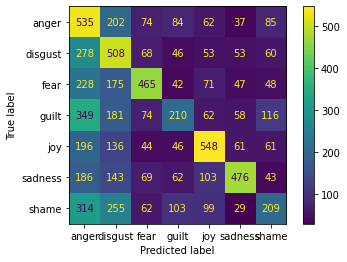

0.3926290580095796
(0.42599019723361803, 0.3916336767425936, 0.39200205185080755, None)


In [65]:
klasifikasi('poly')

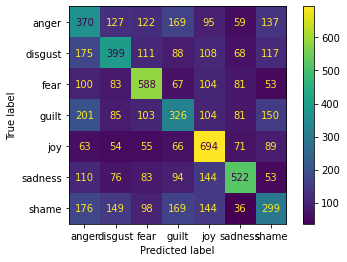

0.42549228312932413
(0.4227685251885708, 0.4244715041110458, 0.42118922805352504, None)


In [66]:
klasifikasi('rbf')

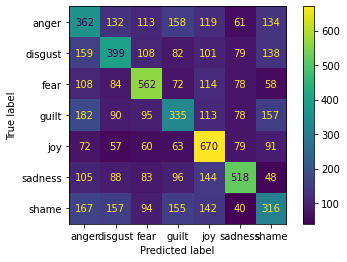

0.42070250133049497
(0.41864004116416664, 0.4197846074750022, 0.41719776903542083, None)


In [67]:
klasifikasi('linear')